# Confusion matrix

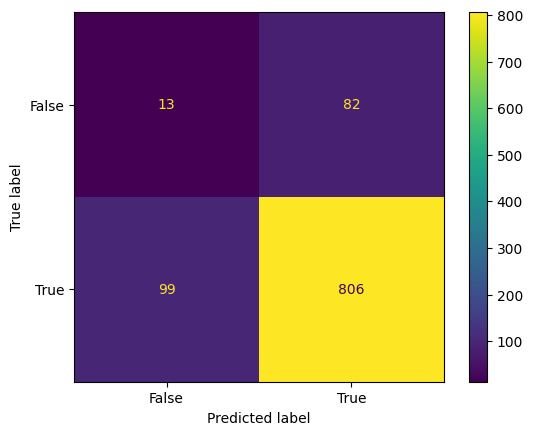

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.819

In [ ]:
Precision = metrics.precision_score(actual, predicted)
Precision

0.9076576576576577

In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.8906077348066298

In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.1368421052631579

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.8990518683770218

In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.819, 'Precision': 0.9076576576576577, 'Sensitivity_recall': 0.8906077348066298, 'Specificity': 0.1368421052631579, 'F1_score': 0.8990518683770218}


# Receiver Operating Characteristic & Area Under Curve

# for Binary classifier

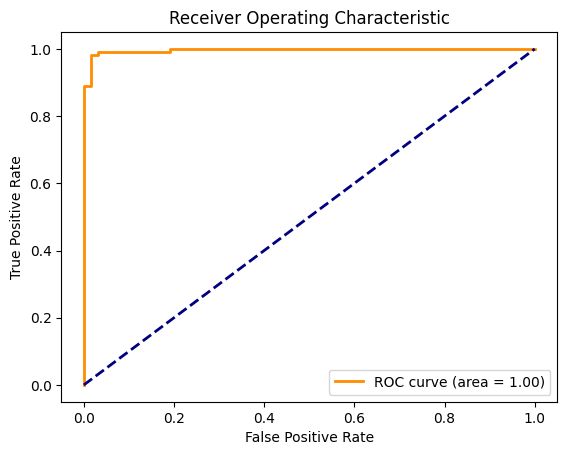

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Load the breast cancer dataset as an example
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Compute decision function values
decision_values = svm.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# for Multiclass classifier

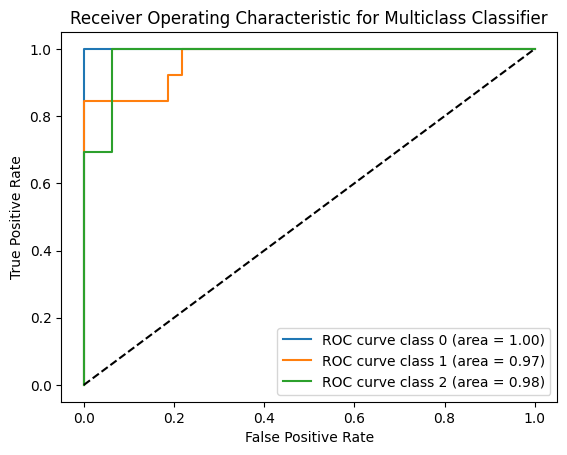

Macro-Average AUC: 0.983173076923077


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the iris dataset as an example (multiclass)
data = datasets.load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a multiclass LogisticRegression classifier
clf = LogisticRegression(max_iter=1000, multi_class='ovr')
clf.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = clf.predict_proba(X_test) #one-vs-rest strategy

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve class {} (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classifier')
plt.legend(loc="lower right")
plt.show()

# Print macro-average AUC
print("Macro-Average AUC:", macro_auc)

